<a id='intro'></a>
# Introduction
Evaluating the given LockerDome raw historical dataset to make specific recommendations on hot to optimize the campaign from LockerDome's perspective.
 - [Introduction](#intro)
 - [Data Wrangling](#dw)
 - [Data Cleaning](#dc)
 - [Exploratory Data Analysis](#eda)
 - [Conclusion](#conclusion)

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn

%matplotlib inline

<a id='dw'></a>
# Data Wrangling

In [2]:
# data loading
df = pd.read_csv('project_data.csv')
df.head()

,Slot.ID,Placement,Ad.Slot.Page.Layout,Creative.ID,Content.Type,Content.Has.Play.Button,Date,Device,Size,Publisher.Split,Impressions,Referrals,Conversions
0,1,NaN,NaN,1,advertorial,yes,12/01/2020,Other,Unknown,0.00,0,0,0
1,2,external_in_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.02,10,0,0
2,3,external_above_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.32,94,0,0
3,4,external_below_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.00,54,0,0
4,5,external_below_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.03,21,1,0


In [3]:
# check lengths and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484486 entries, 0 to 5484485
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Slot.ID                  int64  
 1   Placement                object 
 2   Ad.Slot.Page.Layout      object 
 3   Creative.ID              int64  
 4   Content.Type             object 
 5   Content.Has.Play.Button  object 
 6   Date                     object 
 7   Device                   object 
 8   Size                     object 
 9   Publisher.Split          float64
 10  Impressions              int64  
 11  Referrals                int64  
 12  Conversions              int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 544.0+ MB


In [4]:
# check missing values
df.isnull().sum()

Slot.ID                        0
Placement                  12326
Ad.Slot.Page.Layout        12330
Creative.ID                    0
Content.Type                   0
Content.Has.Play.Button        0
Date                           0
Device                         0
Size                           0
Publisher.Split                0
Impressions                    0
Referrals                      0
Conversions                    0
dtype: int64

In [5]:
# check duplicates
sum(df.duplicated())

0

In [6]:
df.describe()

,Slot.ID,Creative.ID,Publisher.Split,Impressions,Referrals,Conversions
count,5.484486e+06,5.484486e+06,5.484486e+06,5.484486e+06,5.484486e+06,5.484486e+06
mean,1.345321e+03,4.695359e+01,7.263170e-02,8.072069e+01,1.073873e+00,3.063186e-03
std,1.043223e+03,2.446303e+01,1.307282e+00,8.739152e+02,1.989020e+01,8.151255e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.150000e+02,2.100000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.089000e+03,4.800000e+01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
75%,1.881000e+03,7.000000e+01,1.000000e-02,2.000000e+01,0.000000e+00,0.000000e+00
max,4.185000e+03,8.700000e+01,3.616600e+02,2.286710e+05,6.514000e+03,2.100000e+01


<a id='dc'></a>
# Data Cleaning

In [7]:
# delete null values
df.dropna(inplace=True)

In [8]:
df.isnull().sum().any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472156 entries, 1 to 5484482
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Slot.ID                  int64  
 1   Placement                object 
 2   Ad.Slot.Page.Layout      object 
 3   Creative.ID              int64  
 4   Content.Type             object 
 5   Content.Has.Play.Button  object 
 6   Date                     object 
 7   Device                   object 
 8   Size                     object 
 9   Publisher.Split          float64
 10  Impressions              int64  
 11  Referrals                int64  
 12  Conversions              int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 584.5+ MB


In [10]:
df.head()

,Slot.ID,Placement,Ad.Slot.Page.Layout,Creative.ID,Content.Type,Content.Has.Play.Button,Date,Device,Size,Publisher.Split,Impressions,Referrals,Conversions
1,2,external_in_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.02,10,0,0
2,3,external_above_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.32,94,0,0
3,4,external_below_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.00,54,0,0
4,5,external_below_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.03,21,1,0
5,6,external_feed,homepage,1,advertorial,yes,12/01/2020,Mobile,Responsive,5.03,6368,395,2


<a id='eda'></a>
# Exploratory Data Analysis

In [11]:
df.nunique()

Slot.ID                     4179
Placement                      7
Ad.Slot.Page.Layout            4
Creative.ID                   51
Content.Type                   1
Content.Has.Play.Button        2
Date                          90
Device                         4
Size                           8
Publisher.Split             3759
Impressions                12731
Referrals                   1224
Conversions                   19
dtype: int64

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df['Date'].unique()

array(['2020-12-01T00:00:00.000000000', '2020-12-02T00:00:00.000000000',
       '2020-12-03T00:00:00.000000000', '2020-12-04T00:00:00.000000000',
       '2020-12-05T00:00:00.000000000', '2020-12-06T00:00:00.000000000',
       '2020-12-07T00:00:00.000000000', '2020-12-08T00:00:00.000000000',
       '2020-12-09T00:00:00.000000000', '2020-12-10T00:00:00.000000000',
       '2020-12-11T00:00:00.000000000', '2020-12-12T00:00:00.000000000',
       '2020-12-13T00:00:00.000000000', '2020-12-14T00:00:00.000000000',
       '2020-12-15T00:00:00.000000000', '2020-12-16T00:00:00.000000000',
       '2020-12-17T00:00:00.000000000', '2020-12-18T00:00:00.000000000',
       '2020-12-19T00:00:00.000000000', '2020-12-20T00:00:00.000000000',
       '2020-12-21T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
       '2020-12-23T00:00:00.000000000', '2020-12-24T00:00:00.000000000',
       '2020-12-25T00:00:00.000000000', '2020-12-26T00:00:00.000000000',
       '2020-12-27T00:00:00.000000000', '2020-12-28

In [14]:
start_date = '2020-12-01'
end_date = '2021-01-07'
end_date1 = '2021-02-28'

In [15]:
# select columns before '1/7' and after '1/8' to calculate seprate conversion values
before = (df['Date'] >= start_date) & (df['Date'] <= end_date)
after = (df['Date'] > end_date) & (df['Date'] <= end_date1)

In [16]:
df['Conversion_values'] = df['Conversions'] * 35
df.head()

,Slot.ID,Placement,Ad.Slot.Page.Layout,Creative.ID,Content.Type,Content.Has.Play.Button,Date,Device,Size,Publisher.Split,Impressions,Referrals,Conversions,Conversion_values
1,2,external_in_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.02,10,0,0,0
2,3,external_above_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.32,94,0,0,0
3,4,external_below_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.00,54,0,0,0
4,5,external_below_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.03,21,1,0,0
5,6,external_feed,homepage,1,advertorial,yes,2020-12-01,Mobile,Responsive,5.03,6368,395,2,70


In [17]:
df.loc[after].head()

,Slot.ID,Placement,Ad.Slot.Page.Layout,Creative.ID,Content.Type,Content.Has.Play.Button,Date,Device,Size,Publisher.Split,Impressions,Referrals,Conversions,Conversion_values
2034061,415,external_above_content,full_article,1,advertorial,yes,2021-01-08,Other,Responsive,0.00,0,1,0,0
2034062,3,external_above_content,full_article,1,advertorial,yes,2021-01-08,Mobile,Responsive,0.11,32,1,0,0
2034063,4,external_below_content,full_article,1,advertorial,yes,2021-01-08,Mobile,Responsive,0.00,54,0,0,0
2034064,5,external_below_content,full_article,1,advertorial,yes,2021-01-08,Mobile,Responsive,0.01,5,0,0,0
2034065,6,external_feed,homepage,1,advertorial,yes,2021-01-08,Mobile,Responsive,11.57,12856,2137,6,210


In [18]:
df.loc[2034061:,]['Conversion_values'] = df['Conversions'] * 40
# the conversion value of the 2034065th row is 210 for 6 conversions that was not changed. After change the conversion value into $40, we can check this row to ensure everything is correct.
df.loc[2034065]
# This is the correct result since the total conversion values for 6 conversions is 240.

<ipython-input-18-4516a4efbaa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[2034061:,]['Conversion_values'] = df['Conversions'] * 40


Slot.ID                                      6
Placement                        external_feed
Ad.Slot.Page.Layout                   homepage
Creative.ID                                  1
Content.Type                       advertorial
Content.Has.Play.Button                    yes
Date                       2021-01-08 00:00:00
Device                                  Mobile
Size                                Responsive
Publisher.Split                          11.57
Impressions                              12856
Referrals                                 2137
Conversions                                  6
Conversion_values                          240
Name: 2034065, dtype: object

In [19]:
# Therefore, we have the final table for our data which includes the conversion values.
df.head()

,Slot.ID,Placement,Ad.Slot.Page.Layout,Creative.ID,Content.Type,Content.Has.Play.Button,Date,Device,Size,Publisher.Split,Impressions,Referrals,Conversions,Conversion_values
1,2,external_in_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.02,10,0,0,0
2,3,external_above_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.32,94,0,0,0
3,4,external_below_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.00,54,0,0,0
4,5,external_below_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.03,21,1,0,0
5,6,external_feed,homepage,1,advertorial,yes,2020-12-01,Mobile,Responsive,5.03,6368,395,2,70


In [20]:
# the proportion of users converted
df.Conversions.mean()

0.003070087914160342

In [21]:
df.Conversion_values.mean()

0.11832539130828873

In [22]:
# copy the same data to a new table and try to analyze the data
df2 = df.copy()
df2.head()

,Slot.ID,Placement,Ad.Slot.Page.Layout,Creative.ID,Content.Type,Content.Has.Play.Button,Date,Device,Size,Publisher.Split,Impressions,Referrals,Conversions,Conversion_values
1,2,external_in_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.02,10,0,0,0
2,3,external_above_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.32,94,0,0,0
3,4,external_below_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.00,54,0,0,0
4,5,external_below_content,full_article,1,advertorial,yes,2020-12-01,Mobile,Responsive,0.03,21,1,0,0
5,6,external_feed,homepage,1,advertorial,yes,2020-12-01,Mobile,Responsive,5.03,6368,395,2,70


In [23]:
# Replacing the categorical values with dummy variables
df2 = pd.concat([df2, pd.get_dummies(df2['Placement'], prefix='Placement')],axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2['Ad.Slot.Page.Layout'], prefix='Ad.Slot.Page.Layout')],axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2['Content.Type'], prefix='Content.Type')],axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2['Content.Has.Play.Button'], prefix='Content.Has.Play.Button')],axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2['Device'], prefix='Device')],axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2['Size'], prefix='Size')],axis=1)

In [24]:
df2_copy = df2.copy()
#Dropping the dummied variables
df2_copy = df2_copy.drop(['Placement', 'Ad.Slot.Page.Layout', 'Content.Type','Content.Has.Play.Button', 'Device', 'Size'],axis=1)
df2_copy.head()

,Slot.ID,Creative.ID,Date,Publisher.Split,Impressions,Referrals,Conversions,Conversion_values,Placement_external_above_content,Placement_external_below_content,...,Device_Other,Device_Tablet,Size_IAB 300x100 (Mobile Banner),Size_IAB 300x250 (Medium Rectangle),Size_IAB 300x50 (Mobile Banner),Size_IAB 300x600 (Half Page),Size_IAB 336x280 (Large Rectangle),Size_IAB 728x90 (Leaderboard),Size_Responsive,Size_Responsive Limited Height
1,2,1,2020-12-01,0.02,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,2020-12-01,0.32,94,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,2020-12-01,0.00,54,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5,1,2020-12-01,0.03,21,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,6,1,2020-12-01,5.03,6368,395,2,70,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
corrMatrix = df2_copy.corr()
print(corrMatrix)

                                      Slot.ID  Creative.ID  Publisher.Split  \
Slot.ID                              1.000000     0.005343        -0.022215   
Creative.ID                          0.005343     1.000000        -0.018432   
Publisher.Split                     -0.022215    -0.018432         1.000000   
Impressions                         -0.025503    -0.023161         0.729914   
Referrals                           -0.019054    -0.020791         0.840186   
Conversions                         -0.014168    -0.014640         0.654883   
Conversion_values                   -0.013827    -0.014346         0.655061   
Placement_external_above_content     0.028799    -0.000703        -0.000547   
Placement_external_below_content    -0.127072    -0.000374        -0.002349   
Placement_external_feed              0.211836     0.005091        -0.033027   
Placement_external_footer            0.034207     0.003490         0.055940   
Placement_external_in_content       -0.103627    -0.

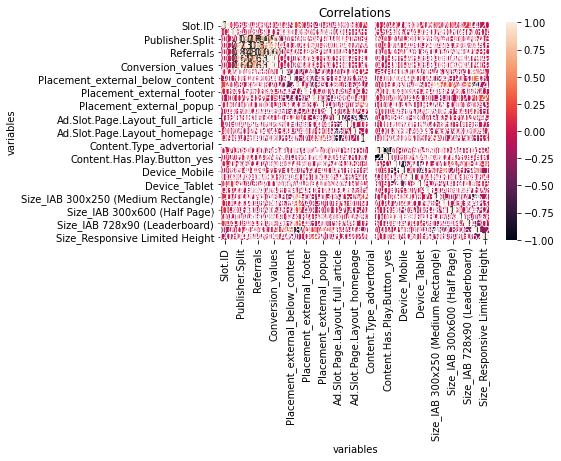

In [26]:
sn.heatmap(corrMatrix, annot=True)

plt.title('Correlations')
plt.xlabel('variables')
plt.ylabel('variables')

plt.show()

In [27]:
df_cre = df.groupby('Creative.ID').agg(Conversion_values=('Conversion_values','sum'))
df_cre

,Conversion_values
Creative.ID,
1,76165
8,0
9,74870
11,36560
12,0
17,105
19,16505
20,18410
21,17690


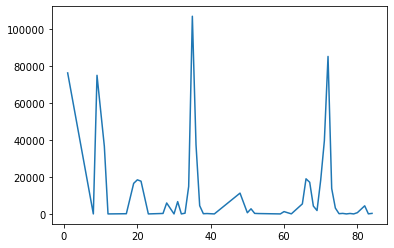

In [28]:
plt.plot(df_cre)

In [29]:
df_slot = df.groupby('Slot.ID').agg(Conversion_values=('Conversion_values','sum'))
df_slot

,Conversion_values
Slot.ID,
2,70
3,120
4,0
5,40
6,13605
...,...
4181,0
4182,0
4183,0


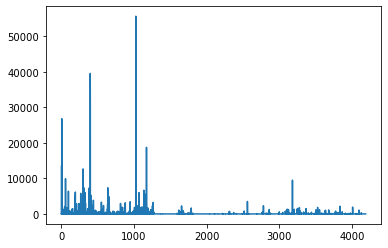

In [30]:
plt.plot(df_slot)

In [35]:
df_slot[df_slot['Conversion_values'] > 10000]

,Conversion_values
Slot.ID,
6,13605
9,26795
301,12665
400,39545
401,31955
1026,55655
1029,27320
1173,18750


In [31]:
df_dev = df.groupby('Device').agg(Conversion_values=('Conversion_values','sum'))
df_dev

,Conversion_values
Device,
Desktop,162570
Mobile,461760
Other,0
Tablet,23165


In [32]:
df_dev_t = df_dev.T
print(df_dev_t)

Device             Desktop  Mobile  Other  Tablet
Conversion_values   162570  461760      0   23165


<a id='conclusion'></a>
# Conclusion

As we can see from above analysis, we may conclude that, for 'Creative_ID', 1,9,35,72 have high conversion values. For 'Slot_ID', 6,9,301,400,401,1026,1029,1173 have high conversion values. For 'Device', desktop and mobile users provide much more conversion values than tablet users. And mobile users provide the high conversion values. Therefore, we suggest that we should pay more attention on mobile users which can let company get more revenue from ads. 